# Task 3: Classification and Association Rule Mining

## **Part A: Decision Tree classifier**

#### Import necessary libraries

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

___
### Modular Functions Used in Decision Tree Classification

- **`load_data(filepath)`**  
  Loads the preprocessed dataset and separates features (`X`) from the target labels (`y`).

- **`split_data(X, y, test_size, random_state)`**  
  Splits the data into training and testing sets for model evaluation.

- **`evaluate_classifier(model, X_train, X_test, y_train, y_test)`**  
  Trains the given classifier and returns performance metrics such as accuracy, precision, recall, and F1-score.

- **`print_classification_report(y_test, y_pred)`**  
  Displays the detailed classification report for each class.

- **`visualize_tree(model, feature_names, class_names)`**  
  Plots and saves a visual representation of the trained Decision Tree, aiding model interpretability.



### Why Modularity Matters

Using modular functions makes the code **cleaner, reusable, and easier to debug or update**. It improves readability and allows individual components to be tested or replaced independently without affecting the overall workflow.


___
### 1. Load Dataset

**The preprocessed dataset from task 1 will be used.**

In [107]:
# load_data function
def load_data(filepath):
    df = pd.read_csv(filepath)
    X = df.drop(['species', 'species_encoded'], axis=1)  # drop original and encoded labels from features
    y = df['species_encoded']  # use encoded numeric labels as target
    return X, y

#### *Explanation:*  
Load the preprocessed Iris dataset from CSV and separate features and target. This ensures the model has input features (X) and labels (y) for training.
___

### 2. Split Data into Train/Test

In [108]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=42, stratify=None):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)


#### *Explanation:*  
Divide the dataset into training and testing sets to evaluate model performance on unseen data. Typically, 80% is used for training and 20% for testing.
___

In [109]:
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics = {
        'accuracy': round(accuracy_score(y_test, y_pred), 2),
        'precision': round(precision_score(y_test, y_pred, average='weighted'), 2),
        'recall': round(recall_score(y_test, y_pred, average='weighted'), 2),
        'f1_score': round(f1_score(y_test, y_pred, average='weighted'), 2)
    }
    
    return metrics, model


In [110]:
from sklearn.metrics import classification_report

def print_classification_report(model, X_test, y_test, target_names=None):
    
# "Prints the classification report for a trained model."
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=target_names, digits=2)
    print("Classification Report:\n", report)


### 3. Train and Evaluate Classifier

#### *Explanation:*  
Train classifiers (Decision Tree and KNN) on the training set and predict on the test set. Compute metrics such as accuracy, precision, recall, and F1-score to assess performance.
___

### 4. Visualize Decision Tree

In [111]:
def visualize_tree(model, feature_names, class_names):
    plt.figure(figsize=(15,10))
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

In [112]:
if __name__ == "__main__":
    # Load data
    X, y = load_data('C:\\Users\\Admin\\Desktop\\iris_preprocessed.csv')
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Feature and class names
    feature_names = X.columns.tolist()
    class_names = y.unique().astype(str).tolist()
    
    # Decision Tree classifier
    dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    
    # Evaluate classifier
    dt_metrics, dt_model = evaluate_classifier(dt_model, X_train, X_test, y_train, y_test)
    
    # Print metrics
    print("Decision Tree Metrics:", dt_metrics)
    
    # Print classification report
    print_classification_report(dt_model, X_test, y_test, target_names=class_names)


Decision Tree Metrics: {'accuracy': 0.97, 'precision': 0.97, 'recall': 0.97, 'f1_score': 0.97}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### **N.B:max depth was limited 3 to decrease chance of overfitting**

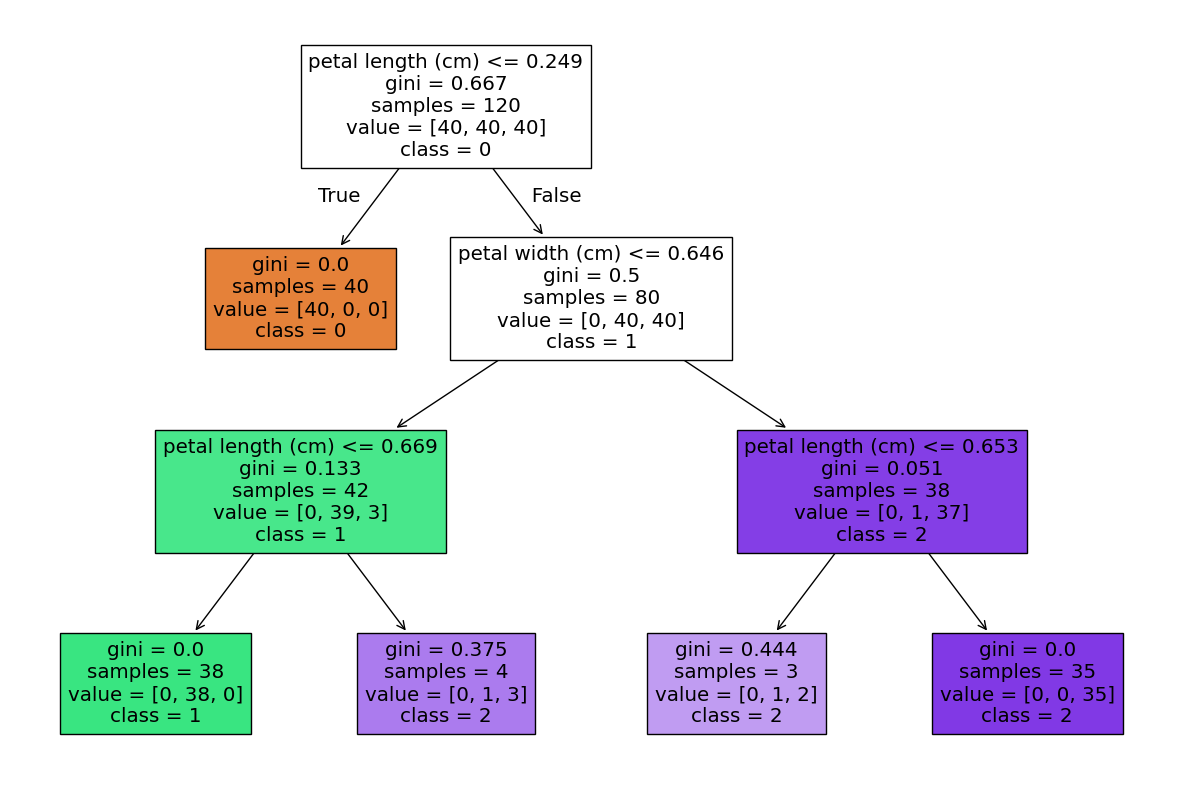

In [113]:
 # Visualize Decision Tree
visualize_tree(dt_model, feature_names, class_names)

### Explanation

Plot the trained Decision Tree to interpret how features are used for classification. Visualization helps understand the model structure and decision rules.  

The tree starts by splitting on **petal length**, indicating it is the most important feature. The **leaf nodes** represent final predictions. For example, the leftmost (green) leaf node indicates **class 1** with **0 Gini impurity**, showing that all samples in this node belong purely to class 1.

___

### 5. Compare Decision Tree with  KNN

In [114]:
# KNN (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_metrics, _ = evaluate_classifier(knn_model, X_train, X_test, y_train, y_test)
print("KNN Metrics:", knn_metrics)

KNN Metrics: {'accuracy': 0.97, 'precision': 0.97, 'recall': 0.97, 'f1_score': 0.97}


In [115]:
# Comparison
print("\nComparison:")
for metric in dt_metrics.keys():
    print(f"{metric}: Decision Tree={dt_metrics[metric]:.3f}, KNN={knn_metrics[metric]:.3f}")
# Print classification report for KNN 
print_classification_report(knn_model, X_test, y_test, target_names=class_names)



Comparison:
accuracy: Decision Tree=0.970, KNN=0.970
precision: Decision Tree=0.970, KNN=0.970
recall: Decision Tree=0.970, KNN=0.970
f1_score: Decision Tree=0.970, KNN=0.970
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



___
## Decision Tree vs KNN Performance on Iris Dataset

#### Overall Metrics
- Both Decision Tree (DT) and KNN achieve **97% accuracy, precision, recall, and F1-score**.  
- Weighted averages show **similar overall performance**, though class-level differences exist.

---

#### Per-Class Performance

| Class | DT Recall | KNN Recall | Notes |
|-------|-----------|------------|-------|
| 0 (Setosa) | 1.00 | 1.00 | Perfectly separable, both models classify correctly |
| 1 (Versicolor) | 0.90 | 1.00 | DT missed 1 instance; KNN captured all but had minor false positives |
| 2 (Virginica) | 1.00 | 0.90 | KNN misclassified 1 boundary point; DT had minor false positives |

---

#### Reason for Differences
- **Decision Tree**: global splits → may slightly underfit overlapping classes.  
- **KNN**: local, distance-based → flexible, captures boundary points better, but sensitive to neighbors.  
- Differences are minor because **Iris dataset is small and mostly well-separated**, with only a few borderline samples.

---

#### Conclusion
- Both models perform very well.  
- DT is interpretable and simple; KNN is flexible and handles subtle boundaries better.  
- Minor class-level differences are due to how each model handles overlapping feature regions.
___


## **Part B: Association Rule Mining**

## 1. Apriori implementation

#### Import necessary libraries

In [116]:
import random
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

___
### Modular Functions Used in Association Rule Mining

- **`generate_transactions(dataframe)`**  
  Converts the dataset into a list of transactions where each transaction contains items bought together. This is essential for applying the Apriori algorithm.

- **`encode_transactions(transactions)`**  
  Transforms the list of transactions into a one-hot encoded DataFrame format required by most association rule mining algorithms like Apriori.

- **`generate_rules(encoded_df, min_support=0.1, min_threshold=0.5)`**  
  Applies the Apriori algorithm to extract frequent itemsets, and then generates strong association rules using confidence and lift thresholds.


### Why Modularity Matters

Modularizing the code in Association Rule Mining improves **clarity and flexibility**. Each function performs a distinct task, making the entire pipeline **easier to understand, test, and modify**. For instance, adjusting thresholds or preprocessing logic becomes simple without disrupting the rest of the code.
___


###  Generate Synthetic Transactional Data  

In [117]:
def generate_transactions(n_transactions=40, seed=42):
    random.seed(seed)
    items_pool = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'butter', 
                  'cereal', 'juice', 'coffee', 'tea', 'soda', 'chips', 'yogurt', 
                  'apples', 'bananas', 'chocolate', 'cookies', 'tomatoes', 'onions']
    
    # Define frequent co-occurring items
    pattern1 = ['milk', 'bread']
    pattern2 = ['diapers', 'beer']
    
    transactions = []
    for _ in range(n_transactions):
        basket = random.choices(items_pool, k=random.randint(3, 8))
        
        # Inject patterns with some probability
        if random.random() < 0.3:
            basket.extend(pattern1)
        if random.random() < 0.2:
            basket.extend(pattern2)
            
        transactions.append(list(set(basket)))  # remove duplicates
    return transactions

___
#### **Data Generation Process**

- **Number of Transactions:**  
  Created between **20 to 50 transactions**, simulating real-world shopping baskets.

- **Items per Transaction:**  
  Each transaction contains a **random selection of 3 to 8 items**.

- **Item Pool:**  
  Items are randomly selected from a **predefined pool of 20 unique items**.

- **Injected Frequent Patterns:**  
  To ensure the dataset includes meaningful and realistic associations:
  - The pattern `['milk', 'bread']` was **injected with a higher probability** to mimic commonly purchased items together.
  - Similarly, `['diapers', 'beer']` was **added to simulate strong co-occurrence**, often used in classic association rule mining examples.

- **Purpose:**  
  This method helps **mimic real-world shopping behavior** and ensures the generation of **strong and interpretable rules** during analysis.
___


###  Encode Transactions 

In [118]:
def encode_transactions(transactions):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    return df

#### *Explanation:*  

Convert the list of transactions into a one-hot encoded pandas DataFrame using `TransactionEncoder`. This format is required for the Apriori algorithm to identify frequent itemsets efficiently.
___

###  Generate Association Rules

In [119]:
def generate_rules(df, min_support=0.2, min_confidence=0.5):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
    rules_sorted = rules.sort_values(by='lift', ascending=False)
    return rules_sorted

#### *Explanation:*  

Apply the Apriori algorithm on the encoded DataFrame to find frequent itemsets with a minimum support threshold. Generate association rules using a minimum confidence threshold, then sort them by lift to highlight the strongest and most interesting associations.
___

### Main Execution

In [120]:
if __name__ == "__main__":
    # Generate synthetic transactions
    transactions = generate_transactions(n_transactions=40, seed=42)
    
    # Encode transactions
    df_encoded = encode_transactions(transactions)
    
    # Generate rules
    rules = generate_rules(df_encoded, min_support=0.2, min_confidence=0.5)
    

In [121]:
# Display top 5 rules by lift
print("Top 5 Association Rules by Lift:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))


Top 5 Association Rules by Lift:

      antecedents    consequents  support  confidence      lift
8    (milk, soda)        (bread)    0.200    1.000000  1.818182
10         (soda)  (milk, bread)    0.200    0.727273  1.711230
9   (soda, bread)         (milk)    0.200    0.888889  1.616162
1          (beer)      (diapers)    0.275    0.785714  1.496599
2       (diapers)         (beer)    0.275    0.523810  1.496599


#### *Explanation:*  

Sequentially run the transaction generation, encoding, and rule generation. Print the top 5 association rules by lift. Analyze the strongest rule, discussing its implications for retail recommendations, using confidence and lift to indicate rule strength.
___

## 2. Rule analysis

___
### Analysis of Association Rule: `(milk, soda) → (bread)`

- **Support:** 0.20 → 20% of all transactions contain milk and soda together with bread.  
- **Confidence:** 1.00 → Every transaction that contains both milk and soda also contains bread.  
- **Lift:** 1.82 → Customers buying milk and soda are 1.82 times more likely to also buy bread compared to random chance.

**Implications for Retail:**
- This rule suggests a strong association between buying milk, soda, and bread. A retailer could use this information to **optimize product placement**, such as placing bread near milk and soda in the store to encourage additional purchases.
- It can also inform **cross-selling or bundling strategies**: offering promotions like “Buy milk and soda, get a discount on bread” could increase sales of bread.
- This insight can further guide **inventory management**, ensuring sufficient stock for items that are frequently purchased together.
___

In [122]:
df_encoded.to_csv('C:\\Users\\Admin\\Desktop\\Generated_transactions.csv', index=False)